<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Homework 6: Clustering </h1>
    <h3></h3>
</center>

### 1. Problem

1) Use agglomerative clustering, K-means clustering, Gaussian mixture model, and DBSCAN to cluster the iris dataset.

2) Calculate Silhouette Coefficients to evaluate the performance of three models.

3) Visualize results: Plot the clustering results in 2D.

### 2. Data processing

Load the iris dataset and preview it.

In [1]:
# Load Packages
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Data Loading
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Preview the dataset
iris_df = datasets.load_iris(as_frame=True).frame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2. Model training and prediction

Use agglomerative clustering, K-means clustering, Gaussian mixture model, and DBSCAN to cluster the iris dataset.

For agglomerative clustering, use average linkage, single linkage and ward linkage.

In [4]:
# Load Python packages
from sklearn import cluster, mixture

In [25]:
y_pred_list = [[] for _ in range(6)]  # to store predicted labels for each model
k = 3  # number of clusters
eps = 0.5  # DBSCAN parameter
# Agglomerative
## average
average = cluster.AgglomerativeClustering(
    linkage="average", n_clusters=k
)
## single
single = cluster.AgglomerativeClustering(
    linkage="single", n_clusters=k
)
## ward
ward = cluster.AgglomerativeClustering(
    linkage="ward", n_clusters=k
)

# K-means
kmeans = cluster.KMeans(n_clusters=k, random_state=42, n_init="auto")

# GMM
gmm = mixture.GaussianMixture(n_components=k, covariance_type='full', random_state=42)


Plot the K-distance graph to help select the hyper-parameter of DBSCAN.

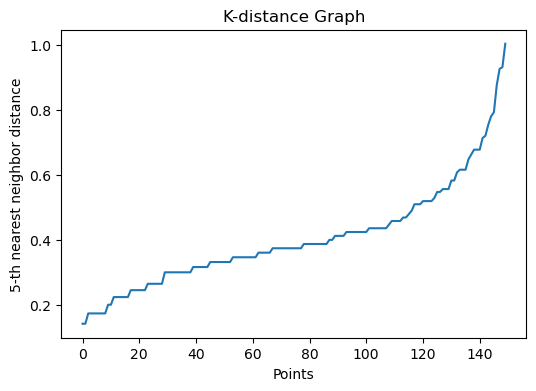

In [26]:
from sklearn.neighbors import NearestNeighbors
from sympy import plot

# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(6, 4))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

# Plot k-distance graph
plot_k_distance_graph(X, k=5)


In [27]:
# DBSCAN
dbscan = cluster.DBSCAN(eps=eps, min_samples=5)

models = [average, single, ward, kmeans, gmm, dbscan]
model_names = ("Agglomerative Clustering (average linkage)","Agglomerative Clustering (single linkage)",
               "Agglomerative Clustering (ward linkage)",
              "K-means Clustering", "Gaussian Mixture Models", "DBSCAN")

# Fit models
for model in models:
    # fit the model
    model.fit(X)
    
    # predict labels
    if hasattr(model, 'labels_'):
        y_pred = model.labels_
    else:
        y_pred = model.predict(X)

    y_pred_list[models.index(model)] = y_pred

c:\Users\yuche\anaconda3\envs\py_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yuche\anaconda3\envs\py_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
# Load Python packages to evaluate the performance
from sklearn.metrics import silhouette_score

SI_list = []

print("----Silhouette Coefficient Reports----")

for (y_pred, model_name) in  zip(y_pred_list, model_names):
    _, cluster_counts = np.unique(y_pred, return_counts=True)
    cluster_num = len(cluster_counts)
    if cluster_num > 1:
        # SI score
        SI = silhouette_score(X, y_pred)
        
    else: # Fail to cluster
        SI = -1
    SI_list.append(SI)
    print(model_name + " :"+str(np.around(SI,decimals = 4)))
    

----Silhouette Coefficient Reports----
Agglomerative Clustering (average linkage) :0.5542
Agglomerative Clustering (single linkage) :0.5121
Agglomerative Clustering (ward linkage) :0.5543
K-means Clustering :0.5512
Gaussian Mixture Models :0.5012
DBSCAN :0.486


### 3. Visualizing results 
Plot the clustering results in 2D.

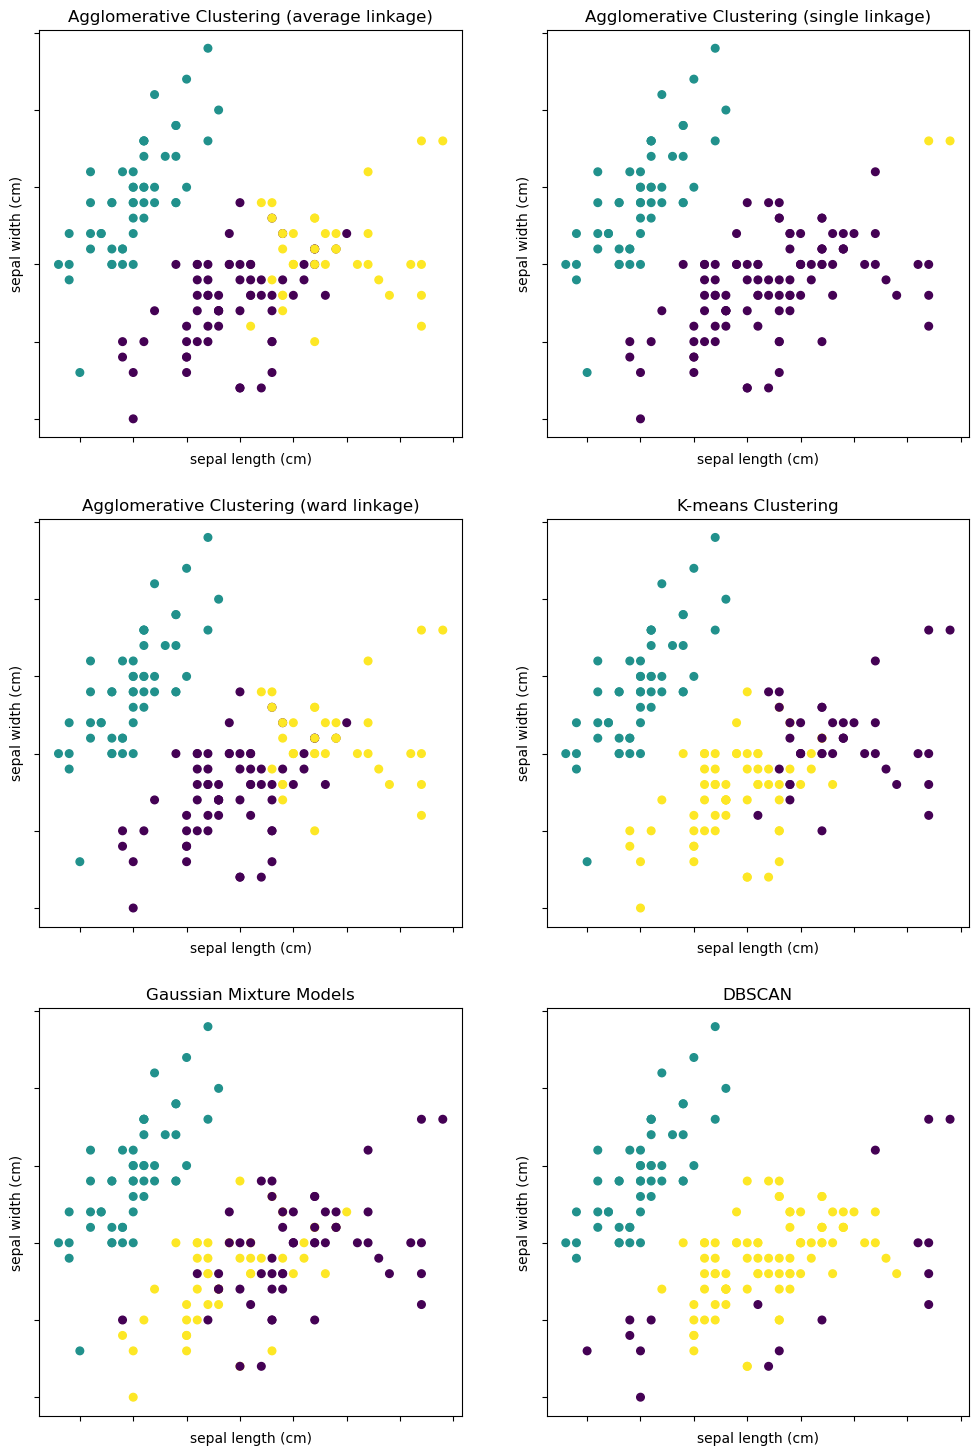

In [29]:
fig = plt.figure(figsize=(12, 18))
for idx, (model_name, y_pred) in enumerate(zip(model_names, y_pred_list)):
    ax = fig.add_subplot(3, 2, idx + 1)
    
    # plot X[:,0] and X[:,1]
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title(model_name)
plt.show()


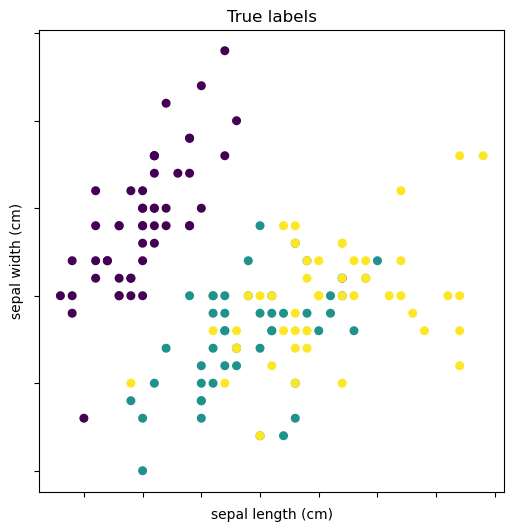

In [30]:
# Plot true labels
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# plot X[:,0] and X[:,1]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)


ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_title("True labels")
plt.show()

#### 